## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata,study_results, 
                                  how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_mouse_study_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_by_ID = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated (['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_by_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_mouse_study_df.loc[combined_mouse_study_df['Mouse ID'] == 'g989']
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data_df = combined_mouse_study_df[combined_mouse_study_df['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_data_df = combined_mouse_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep ='first', inplace = False)
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_data_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
#print(mean)

median = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#print(median)

variance = clean_data_df.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
#print(variance)

standard_dev = clean_data_df.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
#print(standard_dev)

sem = clean_data_df.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']
#print(sem)

summary_stat_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': standard_dev, "SEM": sem})
summary_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stat_df2 = clean_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stat_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

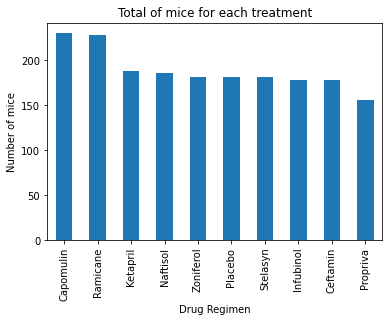

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

total_mice = clean_data_df["Drug Regimen"].value_counts()
total_mice.plot(kind="bar")

#Chart title 
plt.title("Total of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()

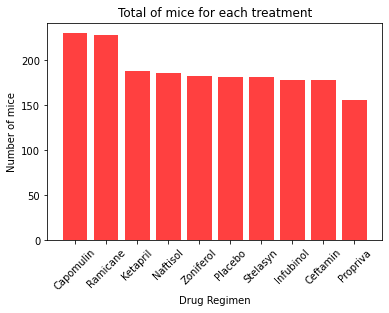

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(total_mice.index.values,total_mice.values, color ="r", alpha=0.75, align= 'center')
plt.xticks(rotation =45)

#chart title
plt.title("Total of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

plt.show()


In [11]:
total_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

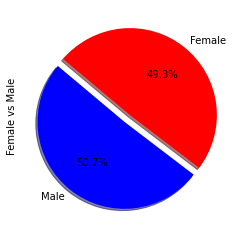

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = clean_data_df["Sex"].value_counts()
colors = ['blue', 'red']
explode = (0.1, 0)
sex_dist.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.ylabel("Female vs Male")
plt.show()

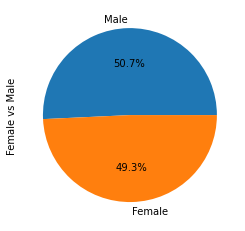

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels1 = sex_dist.index.values
plt.pie(sex_dist.values, labels = labels1, autopct='%1.1f%%')
plt.ylabel("Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()

greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_merge = greatest_timepoint.merge(clean_data_df, on=["Mouse ID", "Timepoint"], how ="left")
data_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = data_merge.loc[data_merge["Drug Regimen"] ==i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quart = tumor_volume.quantile([.25,.5,.75])
    lower_quart=quart[0.25]
    upper_quart=quart[0.75]
    iquart = upper_quart - lower_quart
    lower_B = lower_quart - (1.5*iquart)
    upper_B = upper_quart + (1.5*iquart)
    
    the_outlier = tumor_volume.loc[(tumor_volume < lower_B) | (tumor_volume > upper_B)]
    
    print(f"Drug Name {i} and outlier {the_outlier}")
    
  

Drug Name Capomulin and outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Name Ramicane and outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Name Infubinol and outlier 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Name Ceftamin and outlier Series([], Name: Tumor Volume (mm3), dtype: float64)


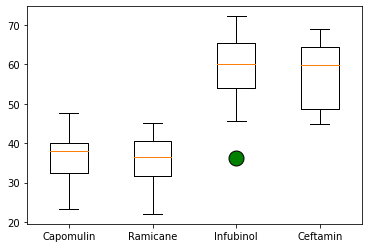

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_marker = dict(markerfacecolor = "green", markersize = 15)
plt.boxplot(tumor_vol_data, labels = treatment_list, flierprops = green_marker)
plt.show()

## Line and Scatter Plots

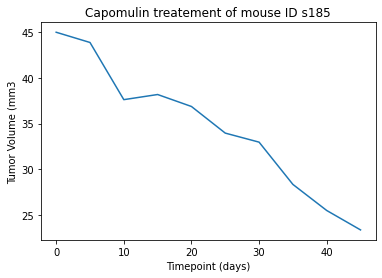

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_tab = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
mouse_data = capomulin_tab.loc[capomulin_tab['Mouse ID'] == 's185']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3')
plt.title('Capomulin treatement of mouse ID s185')
plt.show()

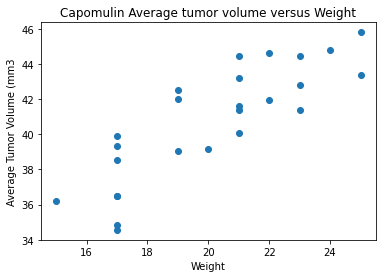

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor_capomulin = capomulin_tab.groupby(["Mouse ID"]).mean()
plt.scatter(average_tumor_capomulin['Weight (g)'], average_tumor_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Capomulin Average tumor volume versus Weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


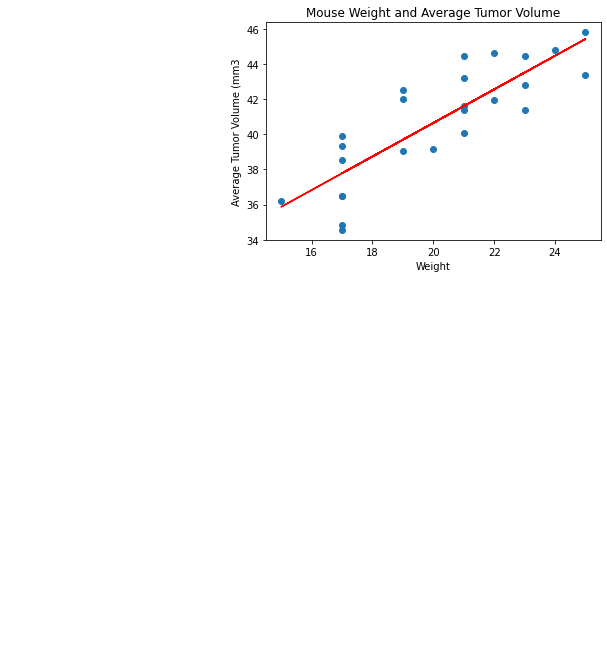

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_tumor_capomulin['Weight (g)'], average_tumor_capomulin['Tumor Volume (mm3)'])[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tumor_capomulin['Weight (g)'], average_tumor_capomulin['Tumor Volume (mm3)'])
regress_values= average_tumor_capomulin['Weight (g)']*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.scatter(average_tumor_capomulin['Weight (g)'],average_tumor_capomulin['Tumor Volume (mm3)'])
plt.plot(average_tumor_capomulin['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Mouse Weight and Average Tumor Volume')
plt.show()